# Generador

In [105]:
sem = 987654321
def congruencial_mixto_borland(cantidad, semi=None, a=22695477, c=1, m=((2 ** 32))):
    global sem
    if semi is not None:
        sem = semi
    numeros = []
    xo = sem
    if cantidad == 1:
        aXi = ( ((a * xo) + c) % m)
        sem = aXi
        return (aXi/m)
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros

In [106]:
semilla=123456789
def congruencial_mixto_randu(cantidad, semi=None, a=65539, c=0, m=((2 ** 31))):
    global semilla
    if semi is not None:
        semilla = semi
    numeros = []
    xo = semilla
    if cantidad == 1:
        aXi = ( ((a * xo) + c) % m)
        semilla = aXi
        return (aXi/m)
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    semilla = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        semilla = aXi
        con = con + 1 
    return numeros

In [107]:
from math import log
def exponencial_llegada(l):
    """
    Generadora exponencial
    @param l: parametro lambda
    return x numero aleatorio siguiendo la funcion exponencial
    """
    U = congruencial_mixto_borland(1)
    x = -(log(1-U)/float(l))
    return x

In [108]:
from math import log
def exponencial_servidor(l):
    """
    Generadora exponencial
    @param l: parametro lambda
    return x numero aleatorio siguiendo la funcion exponencial
    """
    U = congruencial_mixto_randu(1)
    x = -(log(1-U)/float(l))
    return x

In [109]:
def llegada(t_suc):
    global t, n, N_LL, LL, parametro_lambda_llegada, parametro_lambda_servidor, TSuc
    t = t_suc
    clientes.append(n)
    tiempo.append(t)
    n = n + 1
    clientes.append(n)
    tiempo.append(t)
    N_LL = N_LL + 1
    LL.append(t)
    X = exponencial_llegada(1/parametro_lambda_llegada)
    if (t + X) < T:
        TSuc['T_ll'] = t + X
    if n == 1:
        global parametro_lambda_servidor
        Y = exponencial_servidor(1/parametro_lambda_servidor)
        TSuc['T_s'] = t + Y
        Serv.append(Y)
        
    

In [110]:
def servidor(t_suc):
    global t, n, N_s, S, TSuc
    t = t_suc
    clientes.append(n)
    tiempo.append(t)
    n = n - 1
    clientes.append(n)
    tiempo.append(t)
    N_s = N_s + 1
    S.append(t)
    if n > 0:
        Y = exponencial_servidor(1/parametro_lambda_servidor)
        TSuc['T_s'] = t + Y
        Serv.append(Y)
        


El Tiempo medio del sistema es: 18.62143089606288
El Tiempo medio de la cola es: 15.583278021417572
El tiempo medio del servidor es: 3.038152874645303
Número máximo de clientes en el sistema durante la simulación 13 Y total de clientes es 43
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema. 33.20445945120488


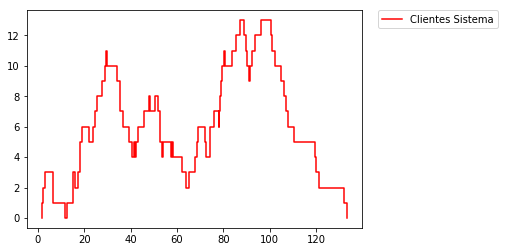

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
t = t_suc = N_LL = N_s = n = 0
T = 100
M = (2 ** 64)
TSuc = {'T_ll':M, 'T_s':M} # Estructura de datos para guardar los tiempos de llegada tLL y los tiempos de conclusión de servicio tS.
LL = [] # instante en el que llega el cliente i-ésimo al sistema.
S = [] # instante en el que sale del sistema el cliente i-ésimo.
Serv = [] # tiempo de servicio recibido por el cliente i-ésimo.
clientes = []
tiempo = []
parametro_lambda_llegada = 3
parametro_lambda_servidor = 3
X = exponencial_llegada(1/parametro_lambda_llegada)
if X > T:
    T_p = t_med_sistema = t_med_cola = 0
else:
    llegada(X)
    while (TSuc['T_ll'] != M or TSuc['T_s'] != M):
        if TSuc['T_ll'] < TSuc['T_s']:
            t_suc = TSuc['T_ll']
            TSuc['T_ll'] = M
            llegada(t_suc)
        if TSuc['T_s'] < TSuc['T_ll']:
            t_suc = TSuc['T_s']
            TSuc['T_s'] = M
            servidor(t_suc)
    T_p = max(0, t - T) # tiempo transcurrido desde T hasta que el último cliente abandona el sistema (variable de salida).
    acumulo1 = acumulo2 = 0
    ind = 0

    while ind < N_LL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1 / N_LL # tiempo medio que pasan los clientes en el sistema (variable de salida).
    t_med_cola = acumulo2 / N_LL # tiempo medio que pasan los clientes en la cola (variable de salida).
    print ("El Tiempo medio del sistema es: {}".format(t_med_sistema))
    print ("El Tiempo medio de la cola es: {}".format(t_med_cola))
    print ("El tiempo medio del servidor es: {}".format(sum(Serv)/len(Serv)))
    # print ("S", S)
    # print ("Serv", Serv)
    print ("Número máximo de clientes en el sistema durante la simulación", max(clientes), "Y total de clientes es", N_LL)
    print ("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema.",  S[len(S)-1] - T)
    plt.plot(tiempo, clientes, color="r", label='Clientes Sistema') 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.legend(loc="upper left")
    plt.show()